In [1]:
#get iris dataset
from sklearn import datasets
import pandas as pd


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from joblib import dump, load

In [3]:
dict_iris_type_mapping = {0 : "Iris Setosa", 1:"Iris Versicolor", 2: "Iris Virginica"} 

In [4]:
iris = datasets.load_iris()
#feature
X = pd.DataFrame(iris.data, columns = list(iris.feature_names))
y = pd.Series(iris.target, name = 'type' ).map(dict_iris_type_mapping)
y.head()

0    Iris Setosa
1    Iris Setosa
2    Iris Setosa
3    Iris Setosa
4    Iris Setosa
Name: type, dtype: object

In [5]:
y.value_counts()

Iris Versicolor    50
Iris Setosa        50
Iris Virginica     50
Name: type, dtype: int64

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, shuffle=True, stratify=y)
X_train.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
8                  4.4               2.9                1.4               0.2
106                4.9               2.5                4.5               1.7
76                 6.8               2.8                4.8               1.4
9                  4.9               3.1                1.5               0.1
89                 5.5               2.5                4.0               1.3

In [8]:
y_train[:3]

8          Iris Setosa
106     Iris Virginica
76     Iris Versicolor
Name: type, dtype: object

In [9]:
#train model 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)

In [10]:
#check model performance
accracy_rate = accuracy_score(y_test, y_hat)
accracy_rate

0.9666666666666667

In [11]:
rf.classes_

array(['Iris Setosa', 'Iris Versicolor', 'Iris Virginica'], dtype=object)

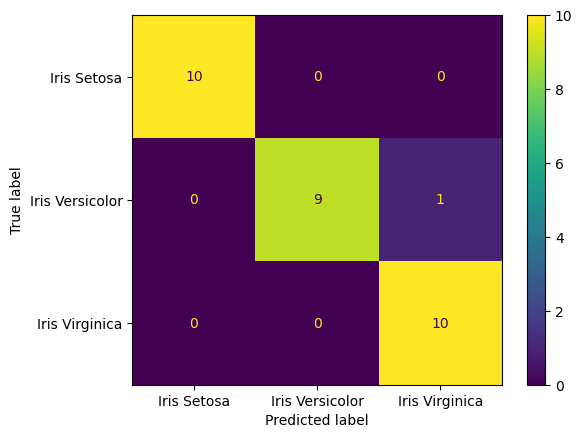

In [12]:
cm = confusion_matrix(y_test, y_hat, labels = rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()

In [15]:
dump(rf, 'iris_rf_model.pkl')

['iris_rf_model.pkl']

In [16]:
X_test.iloc[0, :].to_frame().T

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
38                4.4               3.0                1.3               0.2

In [17]:
rf.predict (X_test.iloc[0, :].to_frame().T)[0]  #get the value of prediction

'Iris Setosa'

In [18]:
X_test.iloc[0, :].to_frame().T

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
38                4.4               3.0                1.3               0.2

In [19]:
pd.Series([4.4, 3, 1.3, 0.2], index=['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)', 'petal width (cm)']).to_frame().T

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                4.4               3.0                1.3               0.2

In [20]:
X = pd.Series([4.4, 3, 1.3, 0.2], index=['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)', 'petal width (cm)']).to_frame().T
rf.predict(X)[0]

'Iris Setosa'

In [21]:
model = load(r'iris_rf_model.pkl')
model.predict (X)

array(['Iris Setosa'], dtype=object)

In [24]:
import pickle
with open('iris_rf_model2.pkl', 'wb') as f:
    # Dump the data into the file    
    pickle.dump(rf, f)

In [25]:
with open('iris_rf_model2.pkl', 'rb') as f:
    # Load the data from the file
    model2 = pickle.load(f)

In [26]:
model2.predict(X)

array(['Iris Setosa'], dtype=object)